In [138]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

import datetime

# Stuff for windrose
from windrose import WindroseAxes
import matplotlib.cm as cm

# plt.rcParams['figure.figsize'] = [11,7]

In [2]:
unitsTab=pd.read_csv('codes/units.csv')
unitsTab.index = unitsTab['Unit Code']
unitsDict=unitsTab.to_dict()["Units"]

In [3]:
paramsTab=pd.read_csv('codes/parameters.csv')
paramsTab.index = paramsTab['Parameter Code']
paramsDict = paramsTab.to_dict()['Parameter']

In [4]:
df=pd.read_csv('raw_data/long_term.csv',parse_dates=[3])
df.dropna(subset=['datetime'],inplace=True)
df.drop(['uncertainty', 'qualifiers', 'frequency'],axis=1, inplace=True)
df.index = df.datetime
df.sort_index(inplace=True)
df.site = df.site.astype(str)
df.tail()

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,site,data_status,action_code,datetime,parameter,duration,value,unit,qc,poc,lat,lon,GISDatum,elev,method_code,mpc,mpc_value
datetime,,,,,,,,,,,,,,,,,
2017-01-01 02:00:00,840420430401,0.0,10.0,2017-01-01 02:00:00,88101.0,60.0,2.500,105.0,0.0,3.0,40.246992,-76.846988,WGS84,125.0,170.0,1.0,5.000
2017-01-01 03:00:00,840420430401,0.0,10.0,2017-01-01 03:00:00,44201.0,60.0,0.031,7.0,0.0,1.0,40.246992,-76.846988,WGS84,125.0,87.0,1.0,0.005
2017-01-01 03:00:00,840420430401,0.0,10.0,2017-01-01 03:00:00,88101.0,60.0,3.200,105.0,0.0,3.0,40.246992,-76.846988,WGS84,125.0,170.0,1.0,5.000
2017-01-01 04:00:00,840420430401,0.0,10.0,2017-01-01 04:00:00,44201.0,60.0,0.030,7.0,0.0,1.0,40.246992,-76.846988,WGS84,125.0,87.0,1.0,0.005
2017-01-01 04:00:00,840420430401,0.0,10.0,2017-01-01 04:00:00,88101.0,60.0,3.300,105.0,0.0,3.0,40.246992,-76.846988,WGS84,125.0,170.0,1.0,5.000


In [5]:
df.sort_index();

In [6]:
df.replace({'unit':unitsDict, 'parameter':paramsDict}, inplace=True)

In [16]:
(SO2, NO2, O3, PM10, CO, PM25) = ['Sulfur dioxide', 'Nitrogen dioxide (NO2)', 'Ozone', 'PM10 Total 0-10um STP',
 'Carbon monoxide', 'PM2.5 - Local Conditions']
print(df.parameter.unique())

['Sulfur dioxide' 'Nitrogen dioxide (NO2)' 'Ozone' 'PM10 Total 0-10um STP'
 'Carbon monoxide' 'PM2.5 - Local Conditions']


In [8]:
[df.datetime.min(),df.datetime.max()]

[Timestamp('2000-01-01 05:00:00'), Timestamp('2017-01-01 04:00:00')]

In [9]:
df.describe()

,data_status,action_code,duration,value,qc,poc,lat,lon,elev,method_code,mpc,mpc_value
count,474936.000000,474936.0,474936.0,474936.000000,474936.0,474936.000000,4.749360e+05,4.749360e+05,474936.0,474936.000000,474936.0,474936.000000
mean,0.431784,10.0,60.0,9.239459,0.0,2.044937,4.024699e+01,-7.684699e+01,125.0,99.556633,1.0,-9.157663
std,0.495325,0.0,0.0,11.372314,0.0,1.631349,2.131630e-14,7.105435e-14,0.0,25.553775,0.0,20.981478
min,0.000000,10.0,60.0,-10.000000,0.0,1.000000,4.024699e+01,-7.684699e+01,125.0,79.000000,1.0,-50.000000
25%,0.000000,10.0,60.0,0.070000,0.0,1.000000,4.024699e+01,-7.684699e+01,125.0,87.000000,1.0,0.005000
50%,0.000000,10.0,60.0,5.000000,0.0,1.000000,4.024699e+01,-7.684699e+01,125.0,93.000000,1.0,0.400000
75%,1.000000,10.0,60.0,14.000000,0.0,3.000000,4.024699e+01,-7.684699e+01,125.0,100.000000,1.0,2.700000
max,1.000000,10.0,60.0,321.000000,0.0,5.000000,4.024699e+01,-7.684699e+01,125.0,170.000000,1.0,5.000000


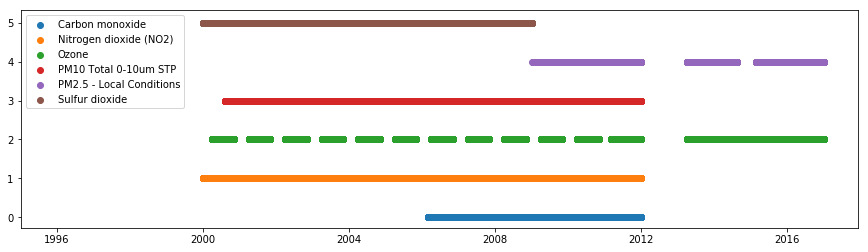

In [10]:
#df[df.parameter==O3].value.plot()
params = list(df.parameter.unique())
params.sort()

ax = plt.figure(figsize=(15,4)).add_subplot(111)

for i, param in enumerate(params):
    data = df[df.parameter == param].index
    ax.scatter(data, [i]*len(data))

ax.set_xlim(left=pd.to_datetime('1/1/1995'))
ax.legend(params);

plt.savefig('data_availability.png',dpi=500)

In [17]:
df.index.min()

Timestamp('2000-01-01 05:00:00')

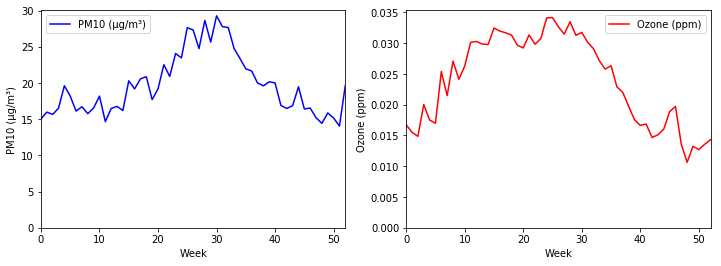

In [18]:
df['doy']=df.index.dayofyear
df['woy']=(df.doy/7).astype(int)
df['tod']=df.index.time

fig = plt.figure(figsize=(12,4)) # Create matplotlib figure

ax = fig.add_subplot(121) # Create matplotlib axes
ax2 = fig.add_subplot(122)


annual_mean = df[df.parameter==PM10].groupby('woy').value.mean()
annual_mean.plot(ax=ax,color='blue')
ax.legend(['PM10 (μg/m³)'],loc='upper left')
ax.set_ylabel('PM10 (μg/m³)')
ax.set_ylim(ymin=0)

annual_mean = df[df.parameter==O3].groupby('woy').value.mean()
annual_mean.plot(ax=ax2,color='red')
ax2.legend(['Ozone (ppm)'])
ax2.set_ylabel('Ozone (ppm)')
ax2.set_ylim(ymin=0)

ax.set_xlabel('Week')
ax2.set_xlabel('Week')

plt.savefig('annual.png',dpi=1000)

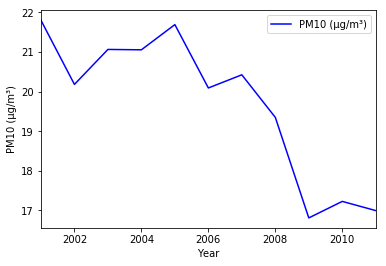

In [19]:
df['doy']=df.index.dayofyear
df['woy']=(df.doy/7).astype(int)
df['tod']=df.index.time
df['year']=df.index.year

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

annual_mean = df[(df.parameter==PM10) & (df.year>=2001) & (df.year<=2011)].groupby('year').value.mean()
annual_mean.plot(ax=ax,color='blue')
ax.legend(['PM10 (μg/m³)'])
ax.set_ylabel('PM10 (μg/m³)')
# ax.set_ylim(ymin=0)

ax.set_xlabel('Year')

plt.savefig('years.png',dpi=1000)

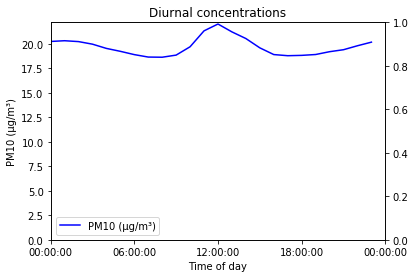

In [20]:
df['doy']=df.index.dayofyear
df['woy']=(df.doy/7).astype(int)
df['tod']=df.index.time
df['year']=df.index.year

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

annual_mean = df[df.parameter==PM10].groupby('tod').value.mean()
annual_mean.plot(ax=ax,color='blue')
ax.legend(['PM10 (μg/m³)'],loc='lower left')
ax.set_ylabel('PM10 (μg/m³)')

# annual_mean = df[df.parameter==O3].groupby('tod').value.mean()
# annual_mean.plot(ax=ax2,color='red')
# ax2.legend(['Ozone (ppm)'],loc='lower right')
# ax2.set_ylabel('Ozone (ppm)')

ax.set_xlabel('Time of day')
ax.set_xticks(np.array(range(0,25,6))*3600)
ax.set_xlim((0,24*3600))
ax.set_ylim(ymin=0)
ax2.set_ylim(ymin=0)
ax.set_title('Diurnal concentrations')

plt.savefig('daily.png',dpi=1000)

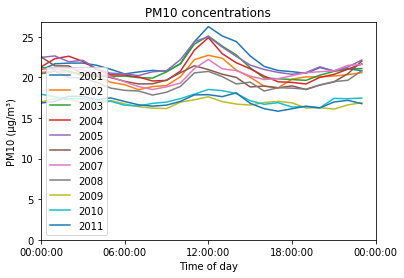

In [21]:
df['doy']=df.index.dayofyear
df['woy']=(df.doy/7).astype(int)
df['tod']=df.index.time
df['year']=df.index.year

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

# years = [2001, 2011]
years = list(range(2001,2012,1))

for year in years:
    annual_mean = df[(df.parameter==PM10) & (df.year==year)].groupby('tod').value.mean()
    annual_mean.plot(ax=ax)

ax.legend(years,loc='lower left')
ax.set_ylabel('PM10 (μg/m³)')

ax.set_xlabel('Time of day')
ax.set_xticks(np.array(range(0,25,6))*3600)
ax.set_xlim((0,24*3600))
ax.set_ylim(ymin=0)

ax.set_title('PM10 concentrations')

plt.savefig('change_pm10.png',dpi=1000)

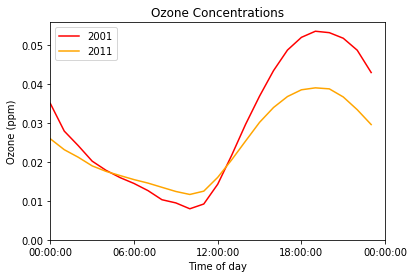

In [22]:
df['doy']=df.index.dayofyear
df['woy']=(df.doy/7).astype(int)
df['tod']=df.index.time
df['year']=df.index.year

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

annual_mean = df[(df.parameter==O3) & (df.year==2001)].groupby('tod').value.mean()
annual_mean.plot(ax=ax,color='red')

annual_mean = df[(df.parameter==O3) & (df.year==2011)].groupby('tod').value.mean()
annual_mean.plot(ax=ax,color='orange')

ax.legend(['2001','2011'])
ax.set_ylabel('Ozone (ppm)')

ax.set_xlabel('Time of day')
ax.set_xticks(np.array(range(0,25,6))*3600)
ax.set_xlim((0,24*3600))
ax.set_ylim(ymin=0)

ax.set_title('Ozone Concentrations')

plt.savefig('change_O3.png',dpi=1000)

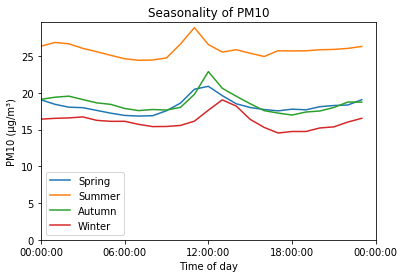

In [207]:
df['doy']=df.index.dayofyear
df['woy']=(df.doy/7).astype(int)
df['tod']=df.index.time
df['year']=df.index.year
df['month']=df.index.month

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

annual_mean = df[(df.parameter==PM10) & (df.month>2) & (df.month<=5)].groupby('tod').value.mean()
annual_mean.plot(ax=ax)

annual_mean = df[(df.parameter==PM10) & (df.month>5) & (df.month<=8)].groupby('tod').value.mean()
annual_mean.plot(ax=ax)

annual_mean = df[(df.parameter==PM10) & (df.month>8) & (df.month<=11)].groupby('tod').value.mean()
annual_mean.plot(ax=ax)

annual_mean = df[(df.parameter==PM10) & ((df.month>11) | (df.month<=2))].groupby('tod').value.mean()
annual_mean.plot(ax=ax)

ax.legend(['Spring','Summer','Autumn','Winter'])
ax.set_ylabel('PM10 (μg/m³)')

ax.set_xlabel('Time of day')
ax.set_xticks(np.array(range(0,25,6))*3600)
ax.set_xlim((0,24*3600))
ax.set_ylim(ymin=0)

ax.set_title('Seasonality of PM10')

plt.savefig('seasonality.png',dpi=1000)

In [24]:
for p in df.parameter.unique():
    print(p, df[df.parameter==p].unit.unique())

Sulfur dioxide ['Parts per billion']
Nitrogen dioxide (NO2) ['Parts per billion']
Ozone ['Parts per million']
PM10 Total 0-10um STP ['Micrograms/cubic meter (25 C)']
Carbon monoxide ['Parts per million']
PM2.5 - Local Conditions ['Micrograms/cubic meter (LC)']


In [25]:
df.tail()

,site,data_status,action_code,datetime,parameter,duration,value,unit,qc,poc,...,GISDatum,elev,method_code,mpc,mpc_value,doy,woy,tod,year,month
datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 02:00:00,840420430401,0.0,10.0,2017-01-01 02:00:00,PM2.5 - Local Conditions,60.0,2.500,Micrograms/cubic meter (LC),0.0,3.0,...,WGS84,125.0,170.0,1.0,5.000,1,0,02:00:00,2017,1
2017-01-01 03:00:00,840420430401,0.0,10.0,2017-01-01 03:00:00,Ozone,60.0,0.031,Parts per million,0.0,1.0,...,WGS84,125.0,87.0,1.0,0.005,1,0,03:00:00,2017,1
2017-01-01 03:00:00,840420430401,0.0,10.0,2017-01-01 03:00:00,PM2.5 - Local Conditions,60.0,3.200,Micrograms/cubic meter (LC),0.0,3.0,...,WGS84,125.0,170.0,1.0,5.000,1,0,03:00:00,2017,1
2017-01-01 04:00:00,840420430401,0.0,10.0,2017-01-01 04:00:00,Ozone,60.0,0.030,Parts per million,0.0,1.0,...,WGS84,125.0,87.0,1.0,0.005,1,0,04:00:00,2017,1
2017-01-01 04:00:00,840420430401,0.0,10.0,2017-01-01 04:00:00,PM2.5 - Local Conditions,60.0,3.300,Micrograms/cubic meter (LC),0.0,3.0,...,WGS84,125.0,170.0,1.0,5.000,1,0,04:00:00,2017,1


In [26]:
df.site.unique()

array(['840420430401'], dtype=object)

# Meterology

In [27]:
meterology = pd.read_csv('raw_data/meterology.csv', parse_dates=['valid'], na_values='M')
meterology.columns = map(lambda s: s.strip(), meterology.columns)
meterology.drop('metar skyc1 skyc2 skyc3 skyc4 skyl1 skyl2 skyl3 skyl4 presentwx'.split(), axis=1, inplace=True)
meterology = meterology[meterology.station=='CXY']
meterology.index = meterology.valid
meterology.sort_index(inplace=True)
# Ignore heading data when wind speed is 0
meterology.loc[meterology.sknt == 0,'drct'] = float('nan')
meterology.head()

,station,valid,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust
valid,,,,,,,,,,,,,,
2000-01-01 00:50:00,CXY,2000-01-01 00:50:00,-76.8515,40.2171,32.0,30.2,92.97,NaN,0.0,NaN,30.17,NaN,7.00,NaN
2000-01-01 01:55:00,CXY,2000-01-01 01:55:00,-76.8515,40.2171,33.8,28.4,80.36,NaN,0.0,NaN,30.19,NaN,7.00,NaN
2000-01-01 11:50:00,CXY,2000-01-01 11:50:00,-76.8515,40.2171,24.8,24.8,100.00,NaN,0.0,NaN,30.26,NaN,0.25,NaN
2000-01-01 12:45:00,CXY,2000-01-01 12:45:00,-76.8515,40.2171,24.8,24.8,100.00,80.0,5.0,NaN,30.27,NaN,0.06,NaN
2000-01-01 13:45:00,CXY,2000-01-01 13:45:00,-76.8515,40.2171,24.8,24.8,100.00,110.0,5.0,NaN,30.28,NaN,0.25,NaN


3900.0

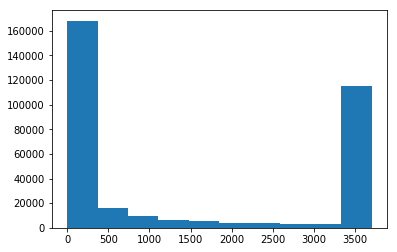

In [28]:
times=meterology.index
times=np.diff(times).astype(int)/10**9
max(times)
plt.hist(times.astype(int),range=(0,3700))
np.percentile(times, 99)

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:973: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


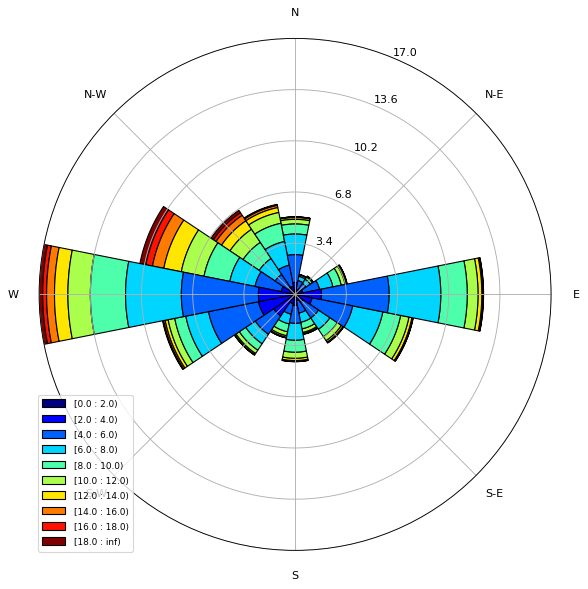

In [53]:
wd = meterology.drct
ws = meterology.sknt

ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=1.0, edgecolor='black',bins=np.arange(0, 20, 2))
ax.set_legend()
plt.savefig('wind_dir.png')

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:973: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


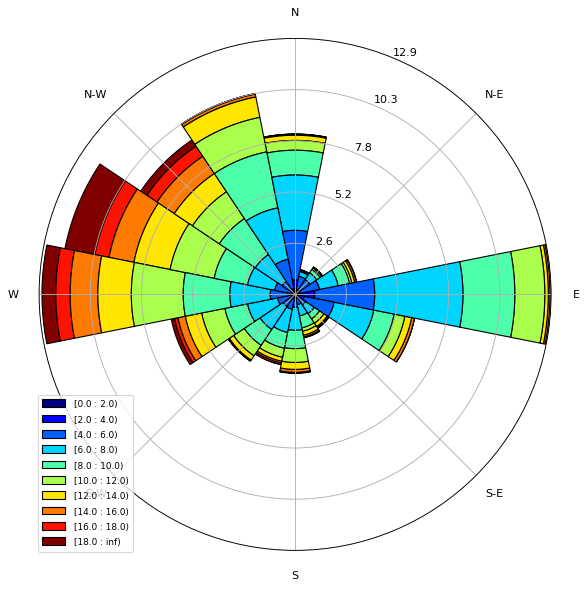

In [156]:
# Exploring time-of-day dependent weather patterns
df['hod'] = [t.hour for t in df.tod]
data = df[(df.parameter==PM10) & (14 == df.hod)]
wd = data.winddir
ws = data.sknt

ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=1.0, edgecolor='black',bins=np.arange(0, 20, 2))
ax.set_legend()
plt.savefig('wind_dir.png')

In [140]:
x=df.tod[0]
x.hour

5

## Connect Meterology to concentrations

In [35]:
dirs = []
speeds = []
meterology.sort_index(inplace=True)
df.sort_index(inplace=True)

# UTC time == EST time + 4 hours
tz_offset = pd.Timedelta('4 hours')
for row in df.iterrows():
    t = row[0] + tz_offset
#     print(t)
    index = meterology.index.searchsorted(t)-1
    met = meterology.iloc[index]
    dirs.append(met.drct)
    speeds.append(met.sknt)
#     print(meterology.iloc[index])

df = df.assign(winddir=pd.Series(dirs, index=df.index),
              sknt=pd.Series(speeds, index=df.index))
# print(dirs, speeds)

In [194]:
df = df.assign(winddir=pd.Series(dirs, index=df.index),
              sknt=pd.Series(speeds, index=df.index))

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:973: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


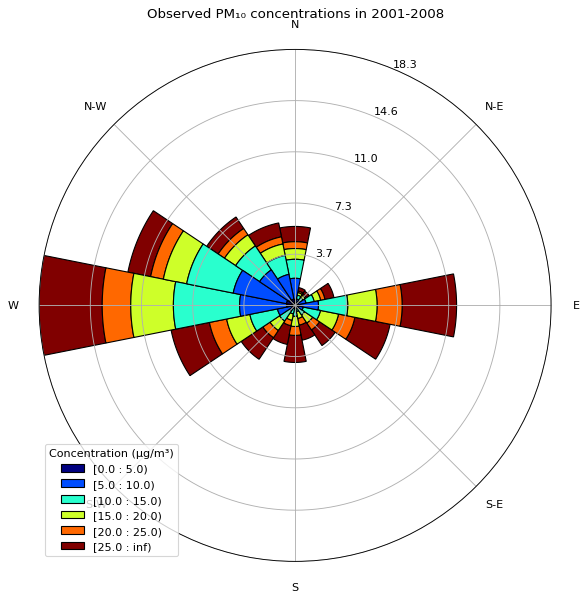

In [195]:
data = df[(df.parameter==PM10) & (df.year<=2008)]
wd = data.winddir
ws = data.value

ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=1.0, edgecolor='black',bins=np.arange(0, 30, 5))
ax.set_legend()
ax.set_title('Observed PM₁₀ concentrations in 2001-2008')
ax.legend().set_title('Concentration (μg/m³)')
plt.savefig('windrose_2.png')

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:973: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


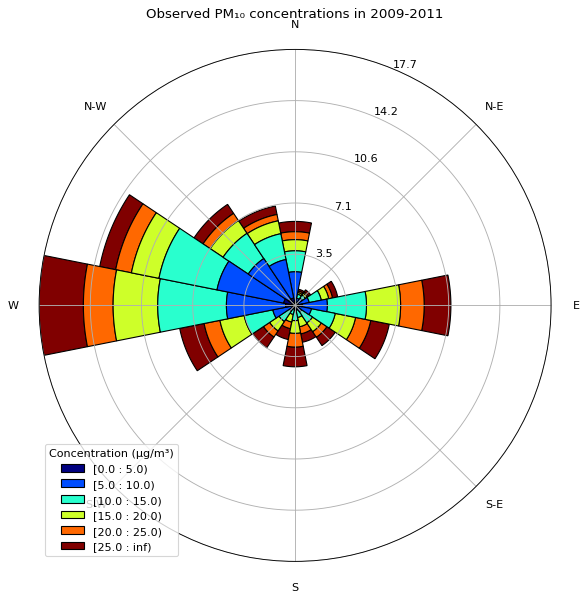

In [212]:
data = df[(df.parameter==PM10) & (df.year>=2009)]
wd = data.winddir
ws = data.value

ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=1.0, edgecolor='black',bins=np.arange(0, 30, 5))
ax.set_legend()
ax.set_title('Observed PM₁₀ concentrations in 2009-2011')
ax.legend().set_title('Concentration (μg/m³)')
plt.savefig('windrose_3.png')

# Gaussian Dispersion modelling

In [197]:
import gaussianPlume

## Incinerator

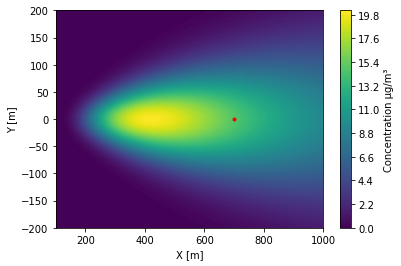

In [213]:
rate = 0.95 # g/s
H = 40. # m
U = 4.1 # m/s
xGrid = np.linspace(100,1000,200) # m
yGrid = np.linspace(-200,200,200) # m
zGrid = 5. #m

pointSource = gaussianPlume.pointSource(0,0,0,rate,H)
grid = gaussianPlume.receptorGrid(xGrid,yGrid,zGrid)
stability = gaussianPlume.stabilityClass('C')

a = gaussianPlume.gaussianPlume(pointSource,grid,stability,U)

concField = a.calculateConcentration()

fig = plt.figure()
ax = fig.add_subplot(111)
c = ax.contourf(grid.xMesh[0],grid.yMesh[0],concField[0]*1e6,100)
cb = fig.colorbar(c)
cb.set_label('Concentration μg/m³')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.plot([700],[0],'r.')
# fig.show()

## Brunner Island

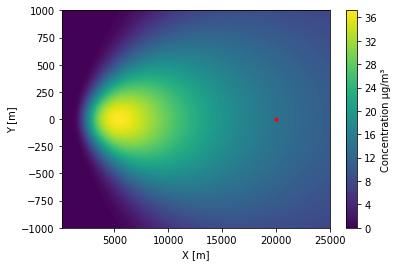

In [216]:
rate = 49.05 # g/s
H = 150. # m
U = 4.1 # m/s
xGrid = np.linspace(100,25000,1000) # m
yGrid = np.linspace(-1000,1000,300) # m
zGrid = 5. #m

pointSource = gaussianPlume.pointSource(0,0,0,rate,H)
grid = gaussianPlume.receptorGrid(xGrid,yGrid,zGrid)
stability = gaussianPlume.stabilityClass('D')

a = gaussianPlume.gaussianPlume(pointSource,grid,stability,U)

concField = a.calculateConcentration()

fig = plt.figure()
ax = fig.add_subplot(111)
c = ax.contourf(grid.xMesh[0],grid.yMesh[0],concField[0]*1e6,100)
cb = fig.colorbar(c)
cb.set_label('Concentration μg/m³')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.plot([20000],[0],'r.')
# fig.show()

# Play

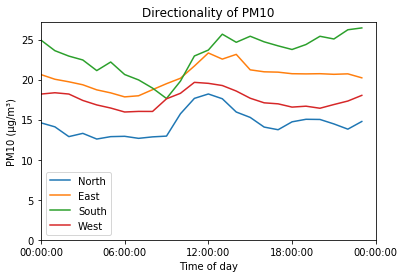

In [208]:
df['doy']=df.index.dayofyear
df['woy']=(df.doy/7).astype(int)
df['tod']=df.index.time
df['year']=df.index.year
df['month']=df.index.month

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

annual_mean = df[(df.parameter==PM10) & ((df.winddir<45) | (df.winddir>=315))].groupby('tod').value.mean()
annual_mean.plot(ax=ax)

annual_mean = df[(df.parameter==PM10) & (df.winddir<135) & (df.winddir>=45)].groupby('tod').value.mean()
annual_mean.plot(ax=ax)

annual_mean = df[(df.parameter==PM10) & (df.winddir<225) & (df.winddir>=135)].groupby('tod').value.mean()
annual_mean.plot(ax=ax)

annual_mean = df[(df.parameter==PM10) & (df.winddir<315) & (df.winddir>=225)].groupby('tod').value.mean()
annual_mean.plot(ax=ax)

ax.legend(['North','East','South','West'])
ax.set_ylabel('PM10 (μg/m³)')

ax.set_xlabel('Time of day')
ax.set_xticks(np.array(range(0,25,6))*3600)
ax.set_xlim((0,24*3600))
ax.set_ylim(ymin=0)

ax.set_title('Directionality of PM10')

plt.savefig('directionality_daily.png',dpi=1000)